In [124]:
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [125]:
print(os.getcwd())
os.chdir('/Users/wuy/Desktop/rainfall_data')

/Users/wuy/Desktop/rainfall_data


In [126]:
#load file 
files = glob.glob(r"*.csv")
print(files)
df = list()
for i in files:
    df_data = pd.read_csv(i)
    df.append(df_data)
df = pd.concat(df)

print(df.shape)


['IDCJAC0009_086383_1800_Data.csv', 'IDCJAC0009_086338_1800_Data.csv', 'IDCJAC0009_086361_1800_Data.csv', 'IDCJAC0009_086282_1800_Data.csv', 'IDCJAC0009_087113_1800_Data.csv']
(62909, 8)


In [127]:
#match station id with name 
station_name = ['Coldstream','Cerberus','Olympic Park', 'Melbourne Airport', 'Avalon' ]
station_id = list(df['Bureau of Meteorology station number'].unique())
station_dic = {}
for i in station_id:
    if i == 86383:
        station_dic[i] = 'Coldstream'
    
    if i == 86338:
        station_dic[i] = 'Olympic Park'
    
    if i == 86361:
         station_dic[i] = 'Cerberus'

    if i == 86282:
        station_dic[i] = 'Melbourne Airport'

    if i == 87113:
        station_dic[i] = 'Avalon' 

print(station_dic)

print('\nColumns names:',list(df.columns))


{86383: 'Coldstream', 86338: 'Olympic Park', 86361: 'Cerberus', 86282: 'Melbourne Airport', 87113: 'Avalon'}

Columns names: ['Product code', 'Bureau of Meteorology station number', 'Year', 'Month', 'Day', 'Rainfall amount (millimetres)', 'Period over which rainfall was measured (days)', 'Quality']


In [128]:
print(df['Bureau of Meteorology station number'].isnull().any())

df['station name'] = df['Bureau of Meteorology station number'].apply(lambda x : station_dic[x])

False


In [129]:
#inspect data
print(df.columns)

df_update = df[['station name', 'Year', 'Month','Day', 'Rainfall amount (millimetres)']]

#inspect data
df_update.head(10)

Index(['Product code', 'Bureau of Meteorology station number', 'Year', 'Month',
       'Day', 'Rainfall amount (millimetres)',
       'Period over which rainfall was measured (days)', 'Quality',
       'station name'],
      dtype='object')


,station name,Year,Month,Day,Rainfall amount (millimetres)
0,Coldstream,1994,1,1,NaN
1,Coldstream,1994,1,2,NaN
2,Coldstream,1994,1,3,NaN
3,Coldstream,1994,1,4,NaN
4,Coldstream,1994,1,5,NaN
5,Coldstream,1994,1,6,NaN
6,Coldstream,1994,1,7,NaN
7,Coldstream,1994,1,8,NaN
8,Coldstream,1994,1,9,NaN
9,Coldstream,1994,1,10,NaN


In [130]:
#check value 
for i in df_update.columns:
    print('\n\n---------\n')
    print('The {} column unique value is :\n'.format(i))
    print(df[i].unique())




---------

The station name column unique value is :

['Coldstream' 'Olympic Park' 'Cerberus' 'Melbourne Airport' 'Avalon']


---------

The Year column unique value is :

[1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 1986 1987 1988 1989 1990 1991 1992 1993 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985]


---------

The Month column unique value is :

[ 1  2  3  4  5  6  7  8  9 10 11 12]


---------

The Day column unique value is :

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


---------

The Rainfall amount (millimetres) column unique value is :

[      nan 1.000e+00 5.000e+00 6.000e+00 7.000e+00 4.000e+00 2.000e+00
 1.900e+01 2.000e-01 1.400e+01 1.700e+01 2.300e+01 4.000e-01 3.000e+00
 6.000e-01 9.000e+00 2.800e+01 1.000e+01 2.700e+01 2.100e+01 2.600e+01
 0.000e+00 1.100e+01 1.200e+01 8.000e+00 8.00

In [131]:
#check missing value 
(df_update.isnull().sum(axis = 0)*100/len(df)).reset_index()\
                            .rename(columns ={"index" : "col_name",
                                                0 : "% percent of missing value"})

,col_name,% percent of missing value
0,station name,0.000000
1,Year,0.000000
2,Month,0.000000
3,Day,0.000000
4,Rainfall amount (millimetres),12.456087


In [132]:
#fill na rainfall with mean
df_update['Rainfall amount (millimetres)']\
                            .fillna(df_data['Rainfall amount (millimetres)'].mean(), inplace = True)

In [133]:
#check missing value again
(df_update.isnull().sum(axis = 0)*100/len(df)).reset_index()\
                            .rename(columns ={"index" : "col_name",
                                                0 : "% percent of missing value"})

,col_name,% percent of missing value
0,station name,0.0
1,Year,0.0
2,Month,0.0
3,Day,0.0
4,Rainfall amount (millimetres),0.0


In [134]:
#inspect data
df_update

,station name,Year,Month,Day,Rainfall amount (millimetres)
0,Coldstream,1994,1,1,1.332207
1,Coldstream,1994,1,2,1.332207
2,Coldstream,1994,1,3,1.332207
3,Coldstream,1994,1,4,1.332207
4,Coldstream,1994,1,5,1.332207
...,...,...,...,...,...
18348,Avalon,2021,3,27,0.200000
18349,Avalon,2021,3,28,0.200000
18350,Avalon,2021,3,29,0.400000
18351,Avalon,2021,3,30,0.200000


In [135]:
df_update[['Year', 'Month', 'Day']] = df_update[['Year', 'Month', 'Day']].astype('str')

In [136]:
df_update['date'] = df_update['Year'] +'-' + df_update['Month'] + '-' + df_update['Day']

In [137]:
df_update['date'] = df_update['date'].astype('datetime64[ns]')
df_update.dtypes

station name                             object
Year                                     object
Month                                    object
Day                                      object
Rainfall amount (millimetres)           float64
date                             datetime64[ns]
dtype: object

In [138]:
df_update['day of week']= df_update['date'].dt.day_name()

In [139]:
df_update = df_update.set_index('date')
df_update = df_update.iloc[:,[0,1,2,-1,3,4]]


In [140]:
df_update
df_2015_feb2021 = df_update.loc['2015-01-01':'2021-02-28']


In [141]:
df_2015_feb2021.head(10)


,station name,Year,Month,day of week,Day,Rainfall amount (millimetres)
date,,,,,,
2015-01-01,Coldstream,2015,1,Thursday,1,0.0
2015-01-02,Coldstream,2015,1,Friday,2,0.0
2015-01-03,Coldstream,2015,1,Saturday,3,0.0
2015-01-04,Coldstream,2015,1,Sunday,4,2.2
2015-01-05,Coldstream,2015,1,Monday,5,0.6
2015-01-06,Coldstream,2015,1,Tuesday,6,0.0
2015-01-07,Coldstream,2015,1,Wednesday,7,0.0
2015-01-08,Coldstream,2015,1,Thursday,8,3.6
2015-01-09,Coldstream,2015,1,Friday,9,0.8


In [142]:
print(station_name)
# filter each station 
df_2015_feb2021_Coldstream = df_2015_feb2021[df_2015_feb2021['station name'] == 'Coldstream']
df_2015_feb2021_Cerberus = df_2015_feb2021 [df_2015_feb2021['station name'] == 'Cerberus']
df_2015_feb2021_OlympicPark = df_2015_feb2021[df_2015_feb2021['station name'] == 'Olympic Park']
df_2015_feb2021_MelbourneAirport = df_2015_feb2021[df_2015_feb2021['station name'] == 'Melbourne Airport']
df_2015_feb2021_Avalon = df_2015_feb2021[df_2015_feb2021['station name'] == 'Avalon']



['Coldstream', 'Cerberus', 'Olympic Park', 'Melbourne Airport', 'Avalon']


<AxesSubplot:xlabel='date'>

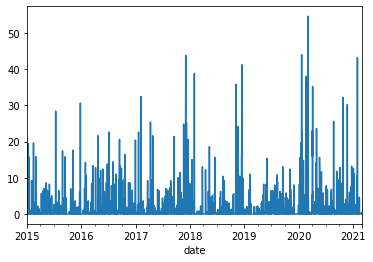

In [161]:

week = df_2015_feb2021_OlympicPark['Rainfall amount (millimetres)'].resample('D').max()
week.plot()

In [144]:
#output dataset 
#df_2015_feb2021.to_csv('rainfall_dataset_5staion.csv')
#df_2015_feb2021_Coldstream.to_csv('rainfall_dataset_Coldsream.csv')
#df_2015_feb2021_Cerberus.to_csv('rainfall_dataset_Cerberus.csv')
#df_2015_feb2021_OlympicPark.to_csv('rainfall_dataset_OlympicPark.csv')
#df_2015_feb2021_MelbourneAirport.to_csv('rainfall_dataset_MelbourneAirport.csv')
#df_2015_feb2021_Avalon.to_csv('rainfall_dataset_Avalon.csv')

In [160]:
%matplotlib inline

<AxesSubplot:xlabel='date'>

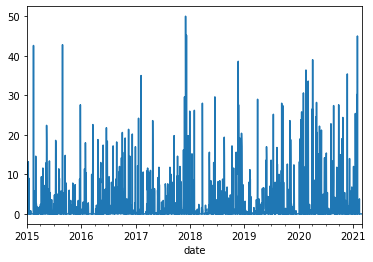

In [146]:
df_2015_feb2021_Coldstream
pic_1 = df_2015_feb2021_Coldstream['Rainfall amount (millimetres)'].resample('D').max()
pic_1.plot()

df_2015_feb2021_Cerberus


<AxesSubplot:xlabel='date'>

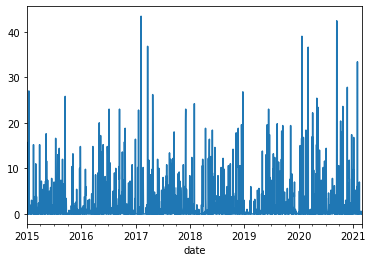

In [147]:
print("df_2015_feb2021_Cerberus")
pic_2 = df_2015_feb2021_Cerberus['Rainfall amount (millimetres)'].resample('D').max()
pic_2.plot()


df_2015_feb2021_OlympicPark


<AxesSubplot:xlabel='date'>

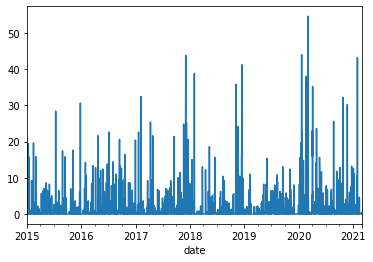

In [148]:
print('df_2015_feb2021_OlympicPark')
pic_3 = df_2015_feb2021_OlympicPark['Rainfall amount (millimetres)'].resample('D').max()
pic_3.plot()

df_2015_feb2021_MelbourneAirport


<AxesSubplot:xlabel='date'>

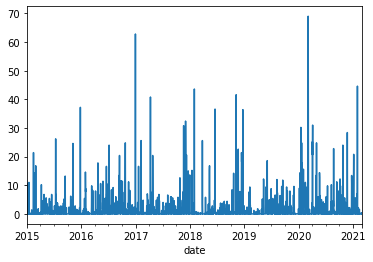

In [149]:
print("df_2015_feb2021_MelbourneAirport")
pic_4 = df_2015_feb2021_MelbourneAirport['Rainfall amount (millimetres)'].resample('D').max()
pic_4.plot()

df_2015_feb2021_Avalon


<AxesSubplot:xlabel='date'>

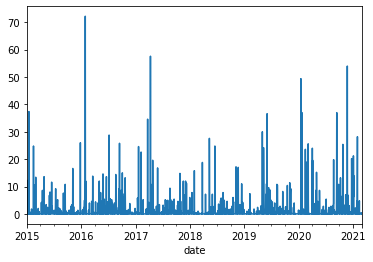

In [150]:
print('df_2015_feb2021_Avalon')
pic_5 = df_2015_feb2021_Avalon['Rainfall amount (millimetres)'].resample('D').max()
pic_5.plot()

In [151]:
station_name

['Coldstream', 'Cerberus', 'Olympic Park', 'Melbourne Airport', 'Avalon']

In [152]:
df_2015_feb2021_OlympicPark.shape

(2251, 6)

In [155]:
df_2015_feb2021_OlympicPark.iloc[0,:]

station name                     Olympic Park
Year                                     2015
Month                                       1
day of week                          Thursday
Day                                         1
Rainfall amount (millimetres)               0
Name: 2015-01-01 00:00:00, dtype: object

In [156]:
df_2015_feb2021_OlympicPark.iloc[-1,:]

station name                     Olympic Park
Year                                     2021
Month                                       2
day of week                            Sunday
Day                                        28
Rainfall amount (millimetres)               0
Name: 2021-02-28 00:00:00, dtype: object